In [1]:
# Read the data from the provided link
import pandas as pd
import numpy as np

df = pd.read_csv('student_scores - student_scores.csv')

In [2]:
# Understand the data by reading first 5 and last 5 records from the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
# Check the shape of data
df.shape

(25, 2)

In [5]:
# Check if there is any null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# Display the summary of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


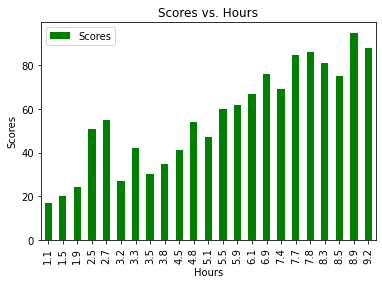

In [7]:
# Group the data using score and hours, then Using bar chart ,plot score vs hours. The next phase is to enter distribution 
# scores and plot them according to the requirement, here we are going to enter the title, x_label, and y_label, and show it
# according to the desired result.

import matplotlib.pyplot as plt
%matplotlib inline

mygroup = df.groupby(['Hours']).sum()
mygroup.plot.bar(color = 'green')

plt.title('Scores vs. Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

Text(0, 0.5, 'Scores')

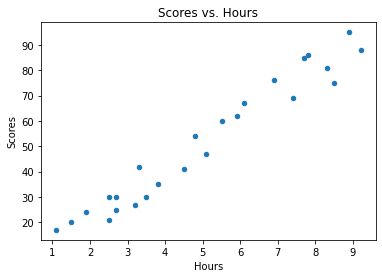

In [8]:
# Visualize distribution of data using scatter plot
df.plot.scatter(x = 'Hours', y = 'Scores')

plt.title('Scores vs. Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')

In [9]:
# Prepare the data by splitting it into Training and Test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[['Hours']], df[['Scores']], test_size = 0.3, random_state = 1)
print(x_train.shape[0], x_test.shape[0])

17 8


C:\Users\13068\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

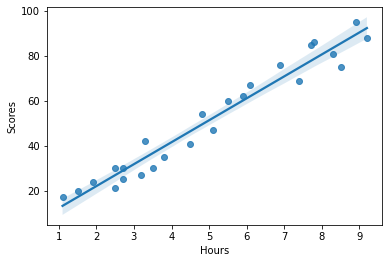

In [11]:
# Plot the regression line
import seaborn as sns
sns.regplot(df.Hours, df.Scores)

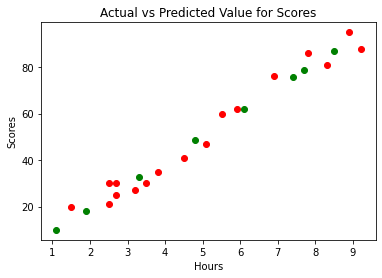

In [12]:
# Plot the training and test data . Predict the score and compare predicted and actual score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
yhat = lr.predict(x_test)

plt.scatter(x_train, y_train, color = 'red')
plt.scatter(x_test, yhat, color = 'green')

plt.title('Actual vs Predicted Value for Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

In [13]:
# Predict accuracy using r2square
lr.score(x_train, y_train)

0.9681980033905908

In [18]:
# Predict the percentage grade of a student if study hours are 9.25
lr.predict([[9.25]])

C:\Users\13068\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[94.78722213]])

In [26]:
# Evaluate the model: Calculate Mean absolute error, mean squared error, root mean squared error
from sklearn import metrics

print('Mean absolute error:', metrics.mean_absolute_error(y_test, yhat))
print('Mean squared error: ', metrics.mean_squared_error(y_test, yhat))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, yhat)))

Mean absolute error: 7.169048271425507
Mean squared error:  56.092330905646705
Root mean squared error: 7.489481350911204


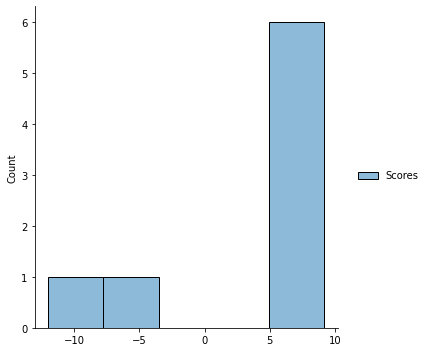

In [31]:
# Import seaborn and plot the distribution as well
sns.displot(y_test-yhat)

In [33]:
# Print actual vs predicted percentage score
print(y_test)
print(yhat)

    Scores
14      17
13      42
17      24
3       75
21      54
10      85
18      67
19      69
[[ 9.93952968]
 [32.84320126]
 [18.26813752]
 [86.97915227]
 [48.45934097]
 [78.65054442]
 [61.99332873]
 [75.52731648]]


In [37]:
# Apply ridge and grid search to improvise your model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameters = [{'alpha':[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters, cv = 4)
Grid1.fit(x_train, y_train)
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=0.001)

In [38]:
BestRR.score(x_test, y_test)

0.8933875823349083